In [1]:
import sys
sys.path.append(r'../../HelperFunctions')

In [2]:
import DataHelper as dh
import AugHelper as ah
import ModelConfigHelper as mch

In [3]:
path_info = dh.getFileDirectory()
path_info

Please enter the root directory of the file path -> C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soil-Type\dataset\Soil_types_v3


{'path': 'C:\\Users\\user\\Desktop\\ML\\PyTorch\\Hackathon\\Soil-Type\\dataset\\Soil_types_v3',
 'type': 'folder'}

In [4]:
dh.showFileCount(pathInfo=path_info)

Black Soil :-
37
Clayey Soil :-
30
Loamy Soil :-
37
Red Soil :-
29
Sandy Soil :-
28


In [5]:
df = dh.getDataFrame(pathInfo=path_info)
df.info()
df.dtypes
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   imgPath       161 non-null    object  
 1   label         161 non-null    category
 2   augmentation  161 non-null    object  
dtypes: category(1), object(2)
memory usage: 3.0+ KB


,imgPath,label,augmentation
0,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,Clayey Soil,normal
1,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,Clayey Soil,normal
2,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,Clayey Soil,normal
3,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,Sandy Soil,normal
4,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,Sandy Soil,normal
...,...,...,...
156,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,Sandy Soil,normal
157,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,Black Soil,normal
158,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,Loamy Soil,normal
159,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,Red Soil,normal


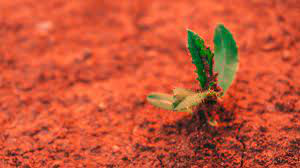

In [6]:
from PIL import Image
img = Image.open(df.iloc[5,0])
img

In [7]:
dictlabels=dh.getLabelDicts(df=df)
dictlabels

Index(['Black Soil', 'Clayey Soil', 'Loamy Soil', 'Red Soil', 'Sandy Soil'], dtype='object')

In [8]:
df = dh.dfPreProcess(df=df)
df.info()
df.dtypes
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   imgPath       161 non-null    object
 1   augmentation  161 non-null    object
 2   ylabel        161 non-null    int8  
dtypes: int8(1), object(2)
memory usage: 2.8+ KB


,imgPath,augmentation,ylabel
0,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,normal,1
1,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,normal,1
2,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,normal,1
3,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,normal,4
4,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,normal,4
...,...,...,...
156,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,normal,4
157,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,normal,0
158,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,normal,2
159,C:\Users\user\Desktop\ML\PyTorch\Hackathon\Soi...,normal,3


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_val = train_test_split(df,test_size=0.2)

In [10]:
augDict = ah.getAugmentation(augmentRequired=False,angle=90)
augDict

{'hFlip': RandomHorizontalFlip(p=1),
 'vFlip': RandomVerticalFlip(p=1),
 'rot': RandomRotation(degrees=[-90.0, 90.0], interpolation=nearest, expand=False, fill=0)}

In [11]:
imgTransform = ah.getImageTransform(200)
imgTransform

Compose(
    Resize(size=(200, 200), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

In [12]:
X_train = ah.augmentDataFrame(df=X_train,augDict=augDict)
X_train
X_train['augmentation'].unique()

array(['vFlip', 'normal', 'rot', 'hFlip'], dtype=object)

In [13]:
X_val
X_val['augmentation'].unique()

array(['normal'], dtype=object)

In [14]:
train_ds  = ah.KroniaDataset(data=X_train,transforms=imgTransform)
val_ds = ah.KroniaDataset(data=X_train,transforms=imgTransform)

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

In [16]:
train_dl = DataLoader(dataset=train_ds,batch_size=32,shuffle=True)
val_dl = DataLoader(dataset=val_ds,batch_size=32,shuffle=True)

In [17]:
from SoilTypeModel import SoilTypeModel
torch.manual_seed(42)
model = SoilTypeModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [18]:
train_loss,val_loss = mch.trainModel(model=model,train_dl=train_dl,val_dl=val_dl,criterion=criterion,optim=optimizer,train_samples=len(X_train),batch_size=32,soft_max=False,epochs=20)

============= New Epoch =========================
epoch:  0  batch:    2 [    64/512]  loss: 1.60822856      accuracy:  18.750%
epoch:  0  batch:    4 [   128/512]  loss: 1.58209157      accuracy:  23.438%
epoch:  0  batch:    6 [   192/512]  loss: 1.43167210      accuracy:  28.646%
epoch:  0  batch:    8 [   256/512]  loss: 1.40095890      accuracy:  30.469%
epoch:  0  batch:   10 [   320/512]  loss: 1.29742622      accuracy:  31.562%
epoch:  0  batch:   12 [   384/512]  loss: 0.83844042      accuracy:  34.115%
epoch:  0  batch:   14 [   448/512]  loss: 1.00025165      accuracy:  37.277%
epoch:  0  batch:   16 [   512/512]  loss: 1.00602078      accuracy:  37.891%
============= New Epoch =========================
epoch:  1  batch:    2 [    64/512]  loss: 1.11360371      accuracy:  42.188%
epoch:  1  batch:    4 [   128/512]  loss: 1.16488421      accuracy:  51.562%
epoch:  1  batch:    6 [   192/512]  loss: 0.96695185      accuracy:  55.729%
epoch:  1  batch:    8 [   256/512]  loss:

epoch: 12  batch:    4 [   128/512]  loss: 0.17598444      accuracy:  95.312%
epoch: 12  batch:    6 [   192/512]  loss: 0.22681174      accuracy:  94.271%
epoch: 12  batch:    8 [   256/512]  loss: 0.23527730      accuracy:  94.141%
epoch: 12  batch:   10 [   320/512]  loss: 0.08272363      accuracy:  94.375%
epoch: 12  batch:   12 [   384/512]  loss: 0.06328944      accuracy:  95.052%
epoch: 12  batch:   14 [   448/512]  loss: 0.12593272      accuracy:  94.866%
epoch: 12  batch:   16 [   512/512]  loss: 0.27383330      accuracy:  94.727%
============= New Epoch =========================
epoch: 13  batch:    2 [    64/512]  loss: 0.05004618      accuracy:  98.438%
epoch: 13  batch:    4 [   128/512]  loss: 0.20875117      accuracy:  96.094%
epoch: 13  batch:    6 [   192/512]  loss: 0.15566164      accuracy:  96.354%
epoch: 13  batch:    8 [   256/512]  loss: 0.13005799      accuracy:  95.703%
epoch: 13  batch:   10 [   320/512]  loss: 0.06581214      accuracy:  96.250%
epoch: 13  bat

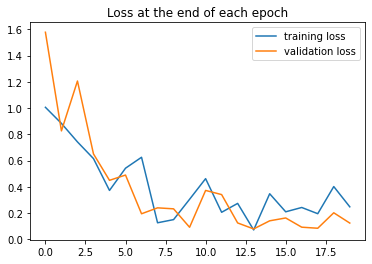

In [19]:
mch.visualiziseTrainResults(train_losses=train_loss,test_losses=val_loss)

In [20]:
# mch.saveModel(model=model,filename="SoilTypeClassifier")